<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
train_images (50000, 32, 32, 3)
uint8 62
train_labels (50000, 1)
uint8 6
test_images (10000, 32, 32, 3)
uint8 112
test_labels (10000, 1)
uint8 3


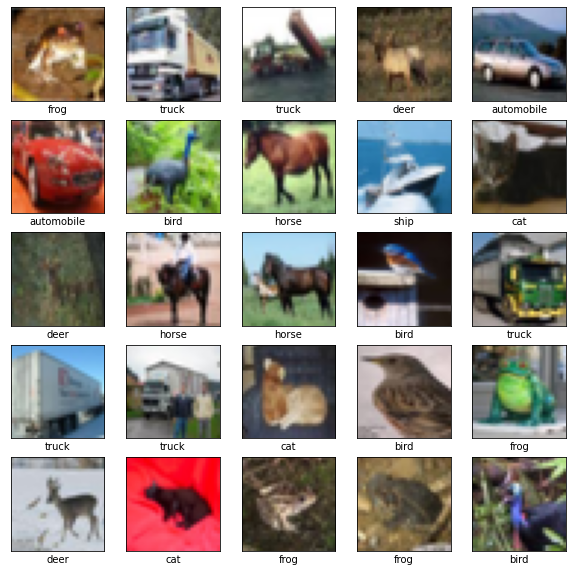

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          32832 

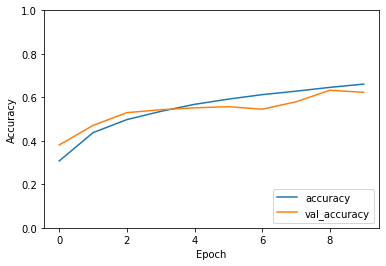

In [ ]:


import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, datasets
# from tensorflow.keras import backend as K
# from tensorflow.python.keras.initializers import RandomUniform
# from tensorflow.python.keras.engine.base_layer import Layer


# Data
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

print(type(train_images), type(train_labels), type(test_images), type(test_labels))
print('train_images', train_images.shape)
print(train_images.dtype, train_images[0, 0, 0, 1])
print('train_labels', train_labels.shape)
print(train_labels.dtype, train_labels[0, 0])
print('test_images', test_images.shape)
print(test_images.dtype, test_images[0, 0, 0, 1])
print('test_labels', test_labels.shape)
print(test_labels.dtype, test_labels[0, 0])


# num_samples = 10000
num_samples = 50000
train_images = train_images.astype('float32')[:num_samples]
test_images = test_images.astype('float32')
train_images /= 255.0
test_images /= 255.0
train_labels = keras.utils.to_categorical(train_labels, 10)[:num_samples]
test_labels = keras.utils.to_categorical(test_labels, 10)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[np.argmax(train_labels[i], axis=0)])
plt.show()



# Model

input_tensor = layers.Input(shape=(32,32,3))
x = layers.Conv2D(filters=32, kernel_size=(4,4), activation='relu')(input_tensor)
x = layers.MaxPool2D(pool_size=(2,2), padding='same')(x)
x = layers.Conv2D(filters=32, kernel_size=(4,4), activation='relu')(x)
x = layers.MaxPool2D(pool_size=(2,2), padding='same')(x)
x = layers.Conv2D(filters=64, kernel_size=(4,4), activation='relu')(x)
x = layers.Flatten()(x)
output_tensor = layers.Dense(units=10, activation='softmax')(x)

model = keras.Model(inputs=[input_tensor], outputs=[output_tensor])

model.summary()


# Loss, Optimizer, Compile

loss_fun = keras.losses.CategoricalCrossentropy()

model.compile(loss=loss_fun, optimizer='rmsprop', metrics=['accuracy']) # sgd, adam, rmsprop

# Training
history = model.fit(train_images,
                    train_labels,
                    validation_data=(test_images, test_labels),
                    epochs=10,
                    batch_size=256,
                    )

# Examine training result
print(history.history.keys())
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)